### Trying superpixel success with grayscale

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
import numpy as np
from matplotlib import cm
import cv2

hs_img_array = np.array(Image.open('/home/nadjaflechner/Palsa_data/cropped_hillshade/hs/735_54_5050_2013_crop_16591_hs.tif'))
hs_image_tensor = torch.from_numpy(hs_img_array)
hs_image_tensor = hs_image_tensor.float().view([1,1,100,100])

bilinear = nn.Upsample(size=200, mode='bilinear')
hs_upsampled_tensor = bilinear(hs_image_tensor).squeeze(0)
hs_img_1d = hs_upsampled_tensor.numpy()

hs_img_3d_arr = cv2.cvtColor(hs_img_1d.squeeze(0).astype(np.uint8), cv2.COLOR_GRAY2RGB)
# hs_img_3d = Image.fromarray(hs_img_3d_arr).convert("RGB")

processed 25.00%
processed 50.00%
processed 75.00%
processed 100.00%


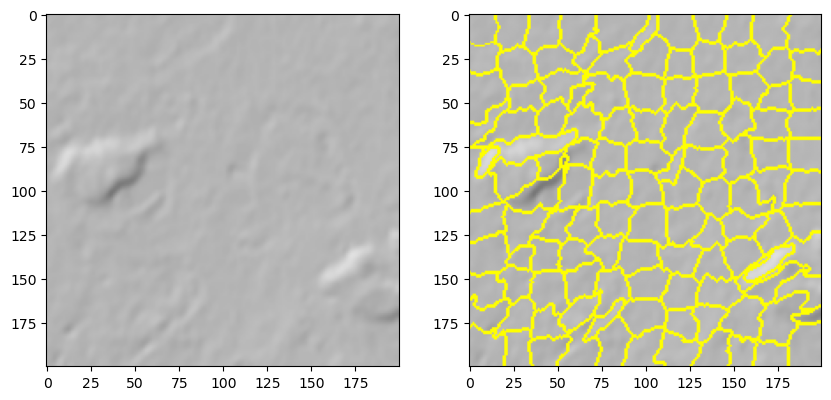

In [15]:
from pkg_resources import resource_stream
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
from skimage.segmentation import mark_boundaries
from pysnic.algorithms.snic import snic


# load image
# color_image = np.array(Image.open('/home/nadjaflechner/Palsa_data/cropped_hillshade/hs/735_54_5050_2013_crop_16591_hs.tif'))
lab_image = skimage.color.rgb2lab(hs_img_3d_arr).tolist()
number_of_pixels = hs_img_3d_arr.shape[0] * hs_img_3d_arr.shape[1]

# SNIC parameters
target_number_of_segments = 100
compactness = 0.5


segmentation, _, centroids = snic(
    lab_image, target_number_of_segments, compactness,
    update_func=lambda num_pixels: print("processed %05.2f%%" % (num_pixels * 100 / number_of_pixels)))
actual_number_of_segments = len(centroids)

# show the output of SNIC

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.imshow(hs_img_3d_arr)
ax2.imshow(mark_boundaries(hs_img_3d_arr, np.array(segmentation)))
plt.show()

### Seeing how well superpixels work with RGB 

processed 25.00%
processed 50.00%
processed 75.00%
processed 100.00%


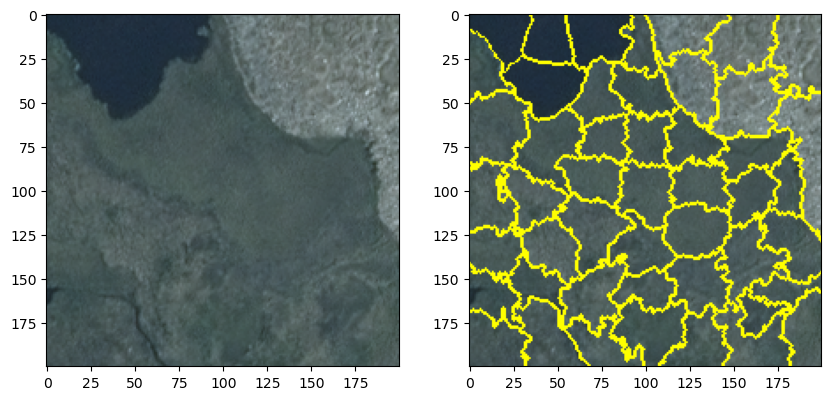

In [17]:
from pkg_resources import resource_stream
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
from skimage.segmentation import mark_boundaries
from pysnic.algorithms.snic import snic


# load image
# color_image = np.array(Image.open('/home/nadjaflechner/Palsa_data/cropped_hillshade/rgb/746_65_5075_2014_crop_16154.tif'))
color_image = np.array(Image.open('/home/nadjaflechner/Palsa_data/cropped_hillshade/rgb/747_65_0075_2014_crop_16271.tif'))

lab_image = skimage.color.rgb2lab(color_image).tolist()
number_of_pixels = color_image.shape[0] * color_image.shape[1]

# SNIC parameters
target_number_of_segments = 40
compactness = 1.00


segmentation, _, centroids = snic(
    lab_image, target_number_of_segments, compactness,
    update_func=lambda num_pixels: print("processed %05.2f%%" % (num_pixels * 100 / number_of_pixels)))
actual_number_of_segments = len(centroids)

# show the output of SNIC

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.imshow(color_image)
ax2.imshow(mark_boundaries(color_image, np.array(segmentation)))
plt.show()

### Trying to get it to work with RGB+depth

In [1]:
import rasterio
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
from skimage.segmentation import mark_boundaries
from pysnic.algorithms.snic import snic
from skimage.color import rgb2lab
import torch


# Prepping one RGB + Depth image: 
with rasterio.open("/Users/nadja/Documents/UU/Thesis/Data/200m/rgb/732_52_5000_2015_crop_88.tif") as RGB_src:
    # Read the image data
    RGB_img = RGB_src.read()

with rasterio.open("/Users/nadja/Documents/UU/Thesis/Data/200m/hs/732_52_5000_2015_crop_88_hs.tif") as hs_src:
    # Read the image data
    hs_img = hs_src.read()


# convert and upsample hs image
hs_image_array = np.array(hs_img)
hs_image_tensor = torch.from_numpy(hs_image_array)
hs_image_tensor = hs_image_tensor.float()
bilinear = nn.Upsample(size=400, mode='bilinear')
hs_upsampled_tensor = bilinear(hs_image_tensor.unsqueeze(0)).squeeze(0) 
hs_upsampled_array = hs_upsampled_tensor.numpy()

# Convert RGB channels to LAB color space
lab_image = rgb2lab(RGB_img)

# Combine LAB channels with height channel
feature_image = np.dstack((lab_image, hs_upsampled_array))


: 

In [3]:

# Generate superpixels using SNIC
segments = snic(feature_image, n_segments=100, compactness=10, seed_type='GRID')

# show the output of SNIC

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.imshow(color_image)
ax2.imshow(mark_boundaries(color_image, np.array(segmentation)))
plt.show()

NameError: name 'image' is not defined